In [3]:
import pandas as pd

employee_df = pd.read_excel('MOCK_DATA.xlsx')

In [5]:
import random
from datetime import datetime, timedelta

logs = []
actions = ['login', 'view_salary', 'download_report', 'update_profile']
resources = ['dashboard', 'payroll', 'personal_data', 'reporting']
start_time = datetime.now()

for _ in range(5000):
    emp = employee_df.sample(1).iloc[0]
    action = random.choice(actions)
    resource = random.choice(resources)
    duration = round(random.expovariate(1/1.5), 2)  # Exponential distribution
    timestamp = start_time - timedelta(minutes=random.randint(0, 10000))
    
    logs.append({
        'timestamp': timestamp,
        'employee_id': emp['employee_id'],
        'action': action,
        'resource_accessed': resource,
        'access_duration': duration
    })

logs_df = pd.DataFrame(logs)

In [8]:
print(logs_df)

                      timestamp  employee_id           action  \
0    2025-08-02 14:32:40.673484          972      view_salary   
1    2025-07-30 10:38:40.673484           28   update_profile   
2    2025-07-28 20:49:40.673484          144  download_report   
3    2025-07-30 12:11:40.673484            4            login   
4    2025-07-31 00:15:40.673484          372  download_report   
...                         ...          ...              ...   
4995 2025-08-01 23:26:40.673484           14   update_profile   
4996 2025-08-02 19:25:40.673484          768   update_profile   
4997 2025-08-02 23:32:40.673484          290  download_report   
4998 2025-07-30 10:52:40.673484           51  download_report   
4999 2025-07-30 02:31:40.673484          296            login   

     resource_accessed  access_duration  
0            dashboard             1.92  
1            reporting             0.04  
2            reporting             3.92  
3            reporting             0.51  
4        

In [10]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(logs_df[['action', 'resource_accessed']]).toarray()

In [12]:
scaler = MinMaxScaler()
duration_scaled = scaler.fit_transform(logs_df[['access_duration']])

In [13]:
import numpy as np

X = np.hstack([encoded_features, duration_scaled])

In [16]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [18]:
logs_df['anomaly_score'] = model.decision_function(X)
logs_df['anomaly'] = model.predict(X)  # -1: anomaly, 1: normal

In [20]:
logs_df['is_anomaly'] = logs_df['anomaly'].map({-1: 'Anomaly', 1: 'Normal'})

In [26]:
print(logs_df['is_anomaly'].value_counts())

is_anomaly
Normal     4950
Anomaly      50
Name: count, dtype: int64


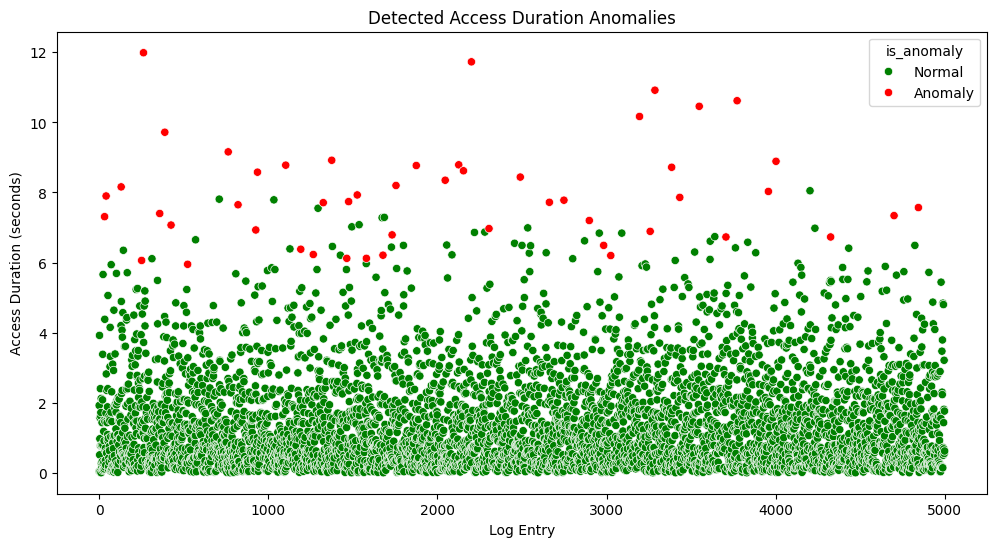

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=logs_df.index, y=logs_df['access_duration'], hue=logs_df['is_anomaly'], palette={'Anomaly':'red', 'Normal':'green'})
plt.title('Detected Access Duration Anomalies')
plt.xlabel('Log Entry')
plt.ylabel('Access Duration (seconds)')
plt.show()